# The fields of economists on DBpedia

In [54]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML
import pandas as pd
import matplotlib.pyplot as plt


In [55]:
query = """

PREFIX  xsd:  <http://www.w3.org/2001/XMLSchema#>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT DISTINCT ?s ?name ?dbpName ?field (year(xsd:dateTime(?Birth_Date)) AS ?Year)

WHERE { ?s a dbo:Economist .
        ?s dbp:birthDate ?Birth_Date .
        ?s dbp:field ?field1 .
        OPTIONAL {?s foaf:name ?name .}
        OPTIONAL {?s dbp:name ?dbpName .} # the name is optional because some people don't have one and we take both name
        #because some people don't have a foaf:name (or the "foaf:name" is double with one of the two is empty).
  BIND(STRAFTER(STR(?field1),"http://dbpedia.org/resource/") AS ?field2)
  BIND(REPLACE(STR(?field2),"[_]"," ") AS ?field) # We cut the URI to keep only the field and after we take of "_".

  FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date) # We choose to keep only the people born after 1800.
  FILTER (str(?field) != "") # We take off the field without value
}
ORDER BY ?Year
"""

In [56]:
sparql = SPARQLWrapper("https://dbpedia.org/sparql")

In [57]:
sparql.setQuery(query)
sparql.setReturnFormat(JSON)

In [58]:
rc = sparql.queryAndConvert()
type(rc)

dict

In [59]:
# Number of rows in the result
len(rc['results']['bindings'])

1251

In [60]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 3:
        print(l)
        i += 1

{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Franz_Hermann_Schulze-Delitzsch'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Hermann Schulze-Delitzsch'}, 'dbpName': {'type': 'literal', 'xml:lang': 'en', 'value': 'Hermann Schulze-Delitzsch'}, 'field': {'type': 'literal', 'value': 'Microfinance'}, 'Year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1808'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Franz_Hermann_Schulze-Delitzsch'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Hermann Schulze-Delitzsch'}, 'dbpName': {'type': 'literal', 'xml:lang': 'en', 'value': 'Hermann Schulze-Delitzsch'}, 'field': {'type': 'literal', 'value': 'Microeconomics'}, 'Year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1808'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Hermann_Heinrich_Gossen'}, 'name': {'type': 'literal

In [61]:
# Extract the values from the first 'n' rows
n = 0
result = []
for l in rc['results']['bindings']:
    if n < 10000 : ## 5:
        uri = l['s']['value']
        try: 
            name = l['name']['value']
        except Exception as e :
            print(e)
            try: 
                name = l['dbpName']['value']
            except Exception as e:
                print(e)
                name = ''
    result.append([uri, name, l['Year']['value'],l['field']['value']])
    n += 1

'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'
'name'
'dbpName'


In [78]:
# read the first two results and give the length of number of people
print(len(result))
result[:2]

1251


[['http://dbpedia.org/resource/Franz_Hermann_Schulze-Delitzsch',
  'Hermann Schulze-Delitzsch',
  '1808',
  'Microfinance'],
 ['http://dbpedia.org/resource/Franz_Hermann_Schulze-Delitzsch',
  'Hermann Schulze-Delitzsch',
  '1808',
  'Microeconomics']]

In [79]:
# Convert a list to a dataframe
df = pd.DataFrame(result, columns=['uri', 'name',  'year', 'field'])
df.head()

,uri,name,year,field
0,http://dbpedia.org/resource/Franz_Hermann_Schu...,Hermann Schulze-Delitzsch,1808,Microfinance
1,http://dbpedia.org/resource/Franz_Hermann_Schu...,Hermann Schulze-Delitzsch,1808,Microeconomics
2,http://dbpedia.org/resource/Hermann_Heinrich_G...,Hermann Heinrich Gossen,1810,Microeconomics
3,http://dbpedia.org/resource/Lorenz_von_Stein,Lorenz von Stein,1815,Political economy
4,http://dbpedia.org/resource/Wilhelm_Georg_Frie...,,1817,Economics


In [80]:
# Display only the people without name
df.loc[df['name'] == '']

,uri,name,year,field
4,http://dbpedia.org/resource/Wilhelm_Georg_Frie...,,1817,Economics
13,http://dbpedia.org/resource/Gustav_von_Schmoller,,1838,Economics
17,http://dbpedia.org/resource/Theodor_Hertzka,,1845,Monetary economics
19,http://dbpedia.org/resource/Charles_Gide,,1847,History of economic thought
28,http://dbpedia.org/resource/Thorstein_Veblen,,1857,Socioeconomics
29,http://dbpedia.org/resource/Thorstein_Veblen,,1857,Economics
35,http://dbpedia.org/resource/Frank_Fetter,,1863,Distribution (economics)
37,http://dbpedia.org/resource/Frank_Fetter,,1863,History
39,http://dbpedia.org/resource/Frank_Fetter,,1863,Theory of imputation
41,http://dbpedia.org/resource/Frank_Fetter,,1863,Political economy


In [81]:
# Group by uri the fields and count them
try:
    df_cf = df.groupby(['uri'])['field'].count() 
except Exception as e:
    print(e)
print(len(df_cf))    
df_cf[-5:]

711


uri
http://dbpedia.org/resource/Yung-Ping_Chen         2
http://dbpedia.org/resource/Ziya_Onis              1
http://dbpedia.org/resource/Zu'bi_M.F._Al-Zu'bi    1
http://dbpedia.org/resource/Zvi_Griliches          1
http://dbpedia.org/resource/Üner_Kırdar            2
Name: field, dtype: int64

In [82]:
### Create a list of twenty years period, i.e. the list of the first year of each period
d_list = []
period = 20
d_start = int(min(df['year']))
d_end = int(max(df['year']))
d_end +=20 # I add 20 years otherwise the persons after the '1968' period have no value.

while d_start < d_end:
    d_list.append(d_start)
    d_start = d_start + period
d_list

[1808, 1828, 1848, 1868, 1888, 1908, 1928, 1948, 1968, 1988]

In [83]:
## create un function to get a period to a year
def get_period(year, years):

    y_int = int(year)
    i = 1
    result = 0

    while i < len(years):
        y_begin = years[i-1]
        y_end = years[i]

        if y_int >= y_begin and y_int < y_end:
            result = years[i-1]
            
        i += 1    
    return result

In [84]:
# Check if the function works
get_period(1891, d_list)

1888

In [85]:
# apply the function to the data frame with de list of twenty years period
try: 
    df['period'] = df.apply(lambda x : get_period(x['year'],d_list), axis=1)
except Exception as e:
    print(e)
df

,uri,name,year,field,period
0,http://dbpedia.org/resource/Franz_Hermann_Schu...,Hermann Schulze-Delitzsch,1808,Microfinance,1808
1,http://dbpedia.org/resource/Franz_Hermann_Schu...,Hermann Schulze-Delitzsch,1808,Microeconomics,1808
2,http://dbpedia.org/resource/Hermann_Heinrich_G...,Hermann Heinrich Gossen,1810,Microeconomics,1808
3,http://dbpedia.org/resource/Lorenz_von_Stein,Lorenz von Stein,1815,Political economy,1808
4,http://dbpedia.org/resource/Wilhelm_Georg_Frie...,,1817,Economics,1808
5,http://dbpedia.org/resource/Wilhelm_Georg_Frie...,Wilhelm Roscher,1817,Economics,1808
6,http://dbpedia.org/resource/John_Elliott_Cairnes,John Elliott Cairnes,1823,Political economy,1808
7,http://dbpedia.org/resource/John_Elliott_Cairnes,John Elliott Cairnes,1823,Political economy,1808
8,http://dbpedia.org/resource/Thorold_Rogers,Thorold Rogers,1823,Political economy,1808
9,http://dbpedia.org/resource/Thomas_Edward_Clif...,Thomas Edward Cliffe Leslie,1825,Political economy,1808


In [86]:
# Crosstab with the number of field by period
print(pd.crosstab(df["field"], df["period"]))

period                  1808  1828  1848  1868  1888  1908  1928  1948  1968
field                                                                       
Abraham Lincoln            0     0     0     0     0     0     0     1     0
Accounting                 0     0     0     1     0     0     0     1     0
Activism                   0     0     0     0     0     0     0     1     0
Africa                     0     0     0     0     0     0     1     0     0
Agricultural economics     0     0     1     2     1     2     2     2     0
...                      ...   ...   ...   ...   ...   ...   ...   ...   ...
Urban economics            0     0     0     0     2     1     3     1     1
Urbanism                   0     0     0     1     0     0     0     0     0
Value theory               0     0     0     1     0     0     0     0     0
Voluntary sector           0     0     0     0     0     0     1     0     0
Welfare economics          0     0     0     1     0     0     4     1     0

In [71]:
df['years'] = df.groupby(['field'])['year'].transform(lambda x : ' '.join(x))
df['count'] = df.groupby(['field']).count() 
  
# drop duplicate data 
df = df.drop_duplicates()    
  
# show the dataframe 

df.head(10)

ValueError: Wrong number of items passed 5, placement implies 1

In [72]:
df1= (df.groupby(by=['Year'])
.count()
.plot(kind="bar"))
plt.ylabel('Field')
plt.xlabel('Year')
plt.title('Barplot of economists fields')
plt.gcf().set_size_inches(50, 30)
plt.xticks(rotation=45)

p1 = plt.figure(1, [50,10])
ax = p1.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,150)
ax.set_ylim(-1,50)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=20, rotation=45)
plt.setp(ax.get_yticklabels(), fontsize=20, rotation=45)
plt.show()

KeyError: 'Year'

In [25]:
m = df.to_numpy()
m

array([['Microfinance', '1808'],
       ['Microeconomics', '1808'],
       ['Microeconomics', '1810'],
       ...,
       ['Macroeconomics', '1983'],
       ['Economics', '1984'],
       ['Public economics', '1986']], dtype=object)

In [26]:
Year = [l[1] for l in m]
field = [l[0] for l in m]

/home/sylvain/anaconda3/envs/Github/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


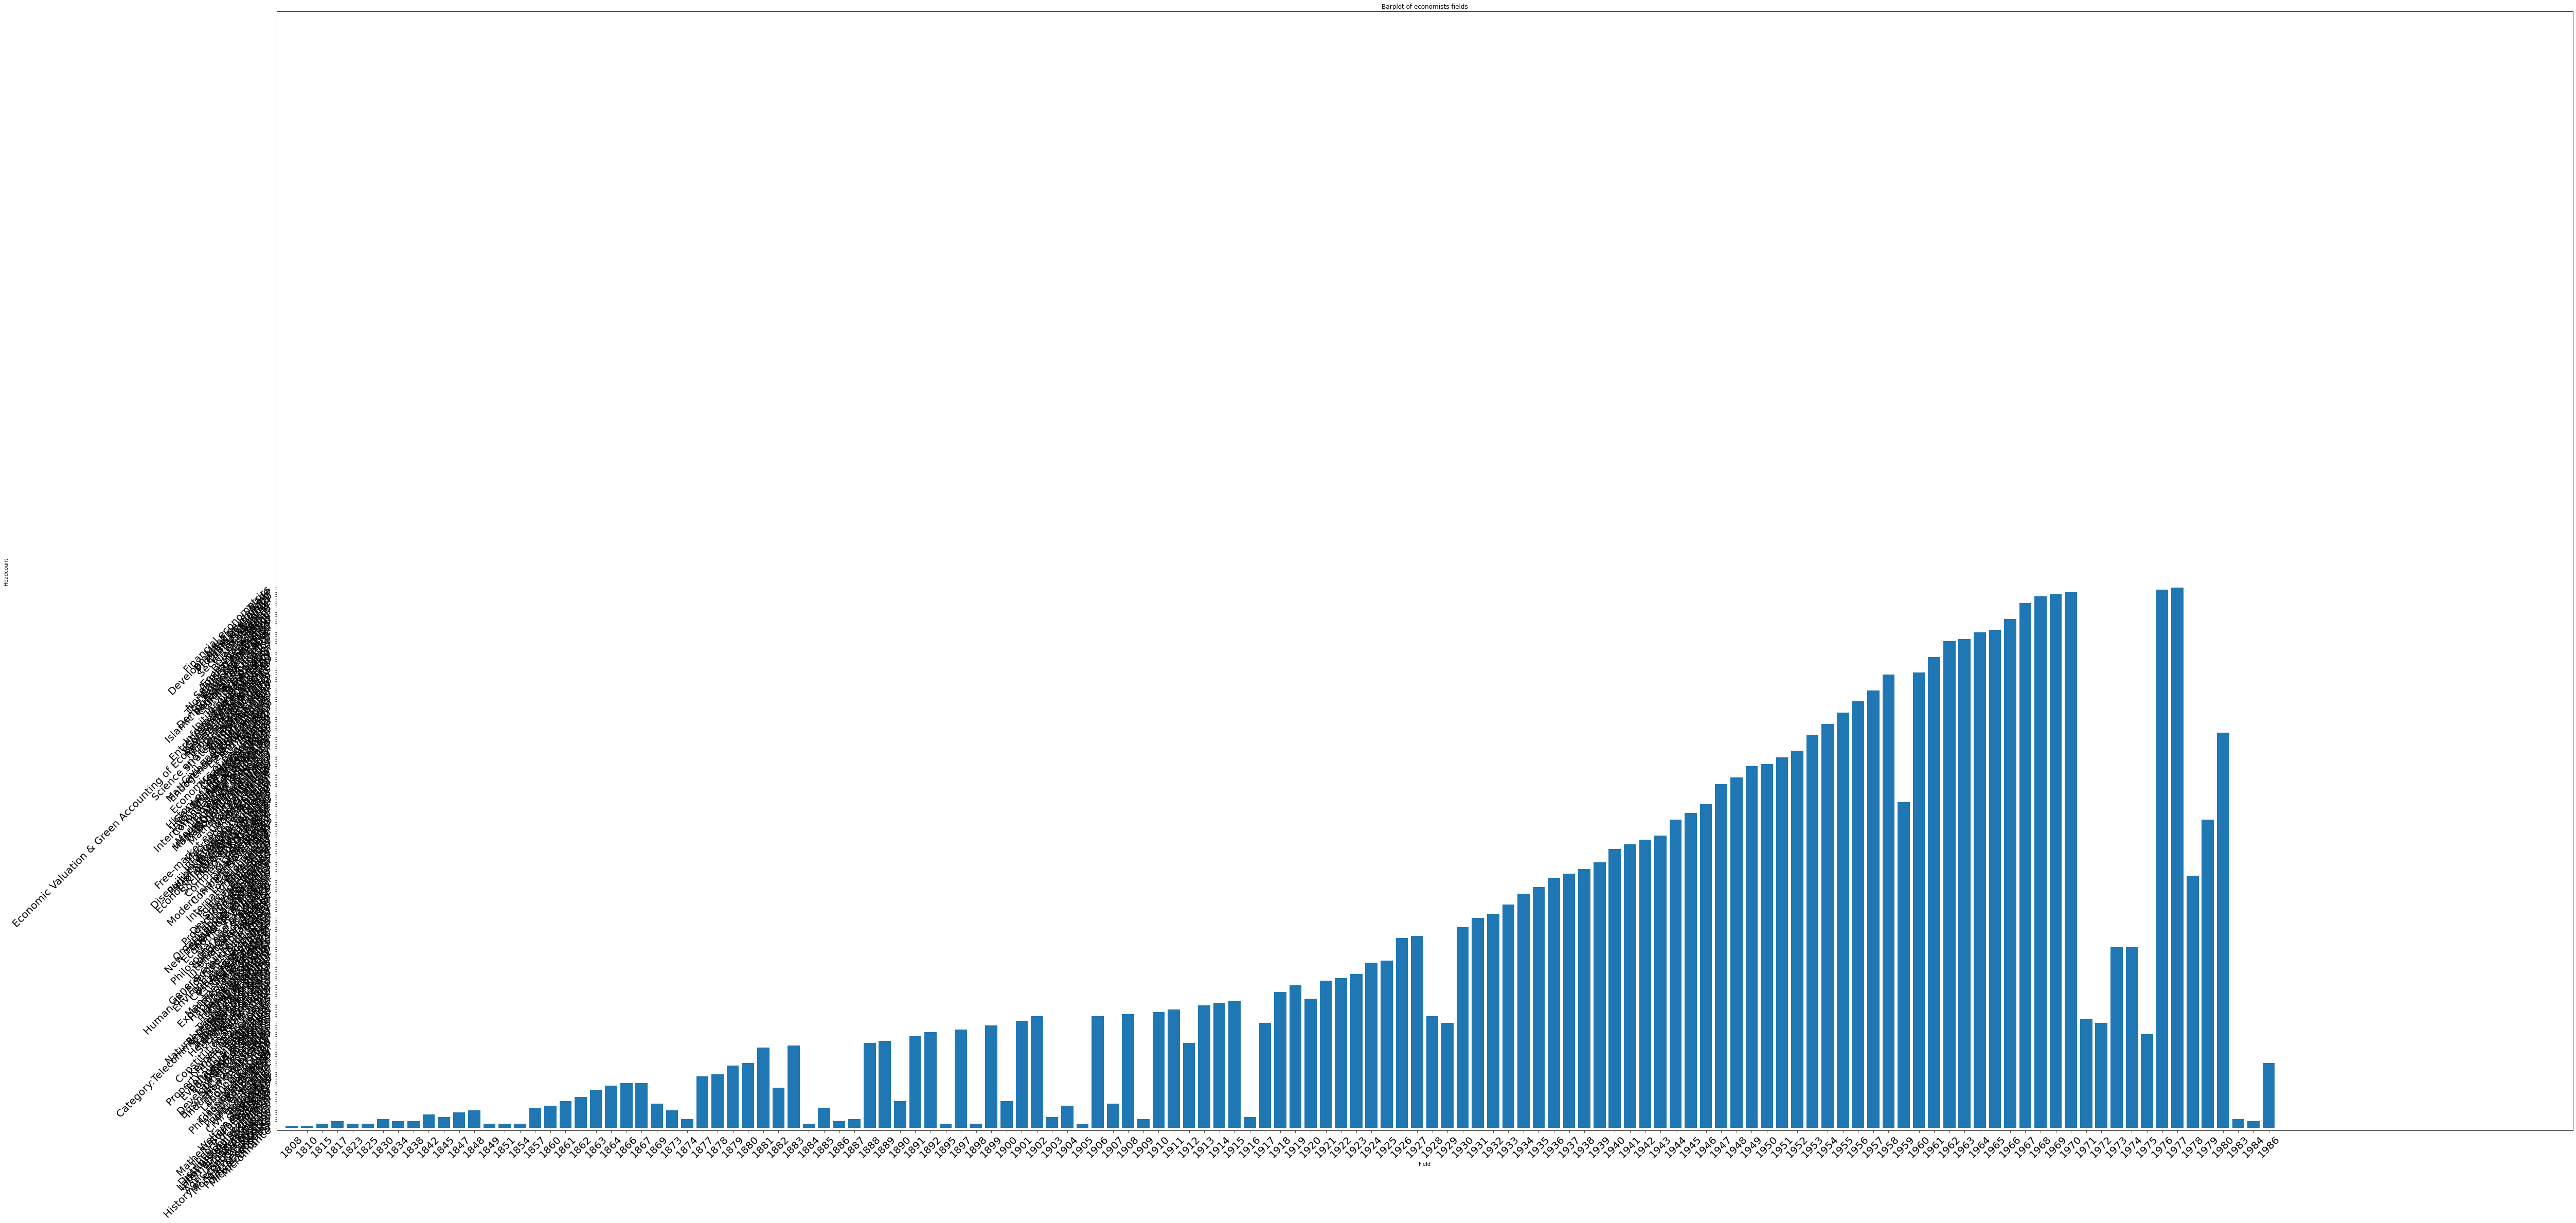

In [27]:
# Barplot of economists fields
eff = [l[1] for l in m]
objects = [l[0] for l in m]

p1 = plt.bar(eff, objects)

plt.ylabel('Headcount')
plt.xlabel('Field')
plt.title('Barplot of economists fields')
plt.gcf().set_size_inches(80, 40)
plt.xticks(rotation=45)

p1 = plt.figure(1, [50, 3])
ax = p1.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,150)
ax.set_ylim(-1,500)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=20, rotation=45)
plt.setp(ax.get_yticklabels(), fontsize=20, rotation=45)
plt.show()

In [28]:
grouped= df.groupby['Year', 'field'], as_index=False['name'].count()
grouped.columns= ['Year']
grouped

TypeError: 'bool' object is not subscriptable